In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

invoices = pd.read_csv(r"C:\Users\ASUS\Downloads\fct_invoice.csv")
customers = pd.read_json(r"C:\Users\ASUS\Downloads\dim_customer.json")

print(invoices.head())
print(customers.head())


  invoice_no  customer_id  category  quantity    price payment_method  \
0    I138884          229  Clothing         5  1500.40    Credit Card   
1    I317333         3433     Shoes         3  1800.51     Debit Card   
2    I127801          644  Clothing         1   300.08           Cash   
3    I173702         4900     Shoes         5  3000.85    Credit Card   
4    I337046         1089     Books         4    60.60           Cash   

  invoice_date   shopping_mall  
0     5/8/2022          Kanyon  
1   12/12/2021  Forum Istanbul  
2    9/11/2021       Metrocity  
3   16/05/2021    Metropol AVM  
4   24/10/2021          Kanyon  
    age first_name gender  id last_name
0  48.0   Nicholas      M   0    Flores
1   NaN    Jeffery      M   1      Rowe
2  57.0     Alexis      F   2    Benton
3  73.0        Amy      F   3   Johnson
4  20.0      David      M   4     Moore


In [9]:
#Easy #1

unique_customers = invoices['customer_id'].nunique()
print("Unique customers:", unique_customers)

Unique customers: 5191


In [10]:
#Easy #2

unique_categories = invoices['category'].unique()
num_categories = invoices['category'].nunique()
print("Categories:", unique_categories)
print("Number of categories:", num_categories)

Categories: ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
Number of categories: 8


In [11]:
#Easy #3

payment_counts = invoices['payment_method'].value_counts()
most_popular_payment = payment_counts.idxmax()
most_popular_count = payment_counts.max()
print("Most popular payment method:", most_popular_payment)
print("Times used:", most_popular_count)

Most popular payment method: Cash
Times used: 44447


In [35]:
#Medium #1

invoices['total_sales'] = invoices['quantity'] * invoices['price']
top_categories = invoices.groupby("category")['total_sales'].sum().sort_values(ascending=False).head(3)
print("Top 3 categories by total sales:\n", top_categories)

Top 3 categories by total sales:
 category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: total_sales, dtype: float64


In [34]:
#Medium #2

merged = invoices.merge(customers, left_on="customer_id", right_on="id", how="left")
if 'total_sales' not in merged.columns:
    # Check for alternative column names that might contain sales data
    if 'amount' in merged.columns:
        sales_over_45 = merged.loc[merged['age'] > 45, 'amount'].sum()
    elif 'sales' in merged.columns:
        sales_over_45 = merged.loc[merged['age'] > 45, 'sales'].sum()
    else:
        print("Available columns:", merged.columns)
        sales_over_45 = 0  # Default value
else:
    sales_over_45 = merged.loc[merged['age'] > 45, 'total_sales'].sum()

print("Total sales from customers over 45:", sales_over_45)

Total sales from customers over 45: 82039768.15


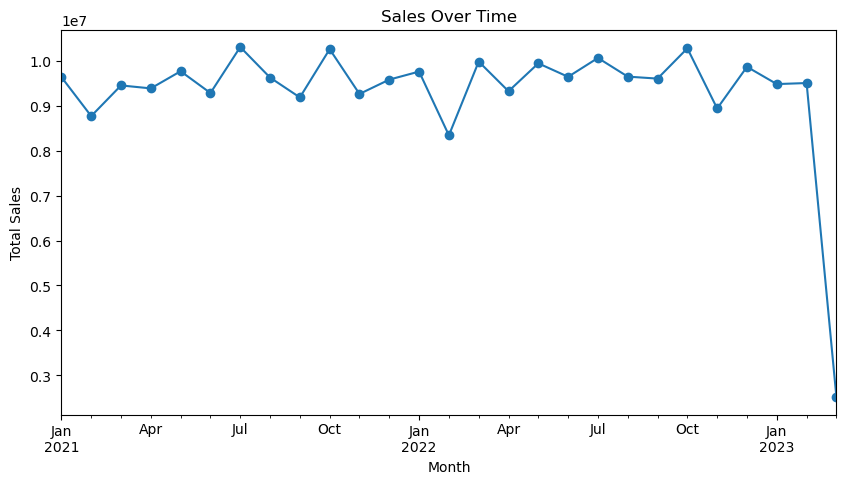

In [36]:
#Medium #3

merged['invoice_date'] = pd.to_datetime(merged['invoice_date'], dayfirst=True, errors='coerce')
sales_by_month = merged.groupby(merged['invoice_date'].dt.to_period("M"))['total_sales'].sum()

import matplotlib.pyplot as plt
sales_by_month.plot(kind="line", marker="o", figsize=(10,5))
plt.title("Sales Over Time")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

In [38]:
#Hard

invoices['quantity'] = pd.to_numeric(invoices['quantity'], errors='coerce').fillna(0)
invoices['price'] = pd.to_numeric(invoices['price'], errors='coerce').fillna(0)
invoices['total_sales'] = invoices['quantity'] * invoices['price']

customers['id'] = pd.to_numeric(customers['id'], errors='coerce').astype('Int64')
invoices['customer_id'] = pd.to_numeric(invoices['customer_id'], errors='coerce').astype('Int64')

merged = invoices.merge(customers, left_on="customer_id", right_on="id", how="left")

bins = np.arange(10, 100, 10)   # 10, 20, ..., 90
labels = [f"{i}-{i+9}" for i in bins[:-1]]  # "10-19", "20-29", ...
merged['age_range'] = pd.cut(merged['age'], bins=bins, labels=labels, right=False)

pivot = pd.pivot_table(
    merged,
    values="total_sales",
    index="category",
    columns="age_range",
    aggfunc="sum",
    fill_value=0
)

print(pivot)

age_range             10-19        20-29        30-39        40-49  \
category                                                             
Books              12801.75     79461.75     84143.10     87203.40   
Clothing         1927413.84  10250732.80  11354126.96  11215189.92   
Cosmetics         109619.36    605915.32    723544.70    665034.96   
Food & Beverage    13582.31     73491.96     87246.86     89553.29   
Shoes             993281.35   5924878.24   7200839.66   7025590.02   
Souvenir           12375.15     54943.32     64092.72     66391.80   
Technology       1129800.00   5261550.00   6159300.00   5954550.00   
Toys               60426.24    385100.80    420582.40    390906.88   

age_range              50-59        60-69       70-79       80-89  
category                                                           
Books               74962.20     80476.80    54827.85    26664.00  
Clothing         10321851.76  10660642.08  7769371.28  4493698.00  
Cosmetics          587780.9

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10248\3495339147.py:16: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = pd.pivot_table(
